# Unveiling the Evolution: Analyzing the Lyrical Sentiment and Streaming Patterns in Sabrina Carpenter’s Career

#### By Emily Nham

August 5, 2024

# Introduction

Earning a spot in Spotify's top 10 artists in the world, Sabrina Carpenter has become increasingly popular this year with almost 80 million monthly listeners. However, her rise to fame in the music industry was nothing close to an overnight sensation. From releasing her first album as a star on the Disney Channel back in 2015 to releasing a now-certified gold album, *emails i can't send*, in 2022, Carpenter has had a steady pathway to success as a pop star.

Having been one of my favorite artists since the start of her career, I decided to dive deeper into her journey as a musical artist. In particular, I was interested in analyzing the sentiment of her songs' lyrics. I wanted to determine if there are any notable changes in the features of her lyrics now that she holds a well-known name in pop culture. To investigate whether the sentiment of her lyrics influenced her growing fame—or vice versa—I examined how the sentiment levels in her songs might correlate with their streaming numbers. Based on this analysis, I made a prediction about the lyrical sentiment of her upcoming sixth studio album, *Short n' Sweet*.

---

> *Research Question: How has the sentiment of Sabrina Carpenter's lyrics evolved throughout her musical career, and what patterns are observable in relation to songs' streaming numbers? Additionally, based on previous song statistics and the currently released tracks from her upcoming album, what can be anticipated about the sentiment of this new album?*

---

No such prior data analysis can be found on this topic analyzing Carpenter. However, [similar ideas have been explored for other artists like Taylor Swift](https://medium.com/@roof6920/info-3501-taylor-swift-an-analysis-of-sentiment-variety-and-album-success-2858a2ef08dc).

# Methods: Obtaining and Exploring Data

Using the data sources below, I visualized the relationship between Carpenter’s lyrical sentiment and stream counts, aiming to determine if there is a direct correlation with her success. With this information, I made predictions about the sentiment of her upcoming album, *Short n' Sweet*.

*Note: All comments made was based on the data as of August 5, 2024. However, running the Python notebook will always obtain the most up-to-date data from the sources.*

### Lyrical Data Collection

The lyrical data used in this project was collected from [Lyrics.com](https://lyrics.com), an online music community containing a large collection of song lyrics, album information, and video clips. Lyrics.com is a collaborative platform that relies on volunteer editors to contribute lyrics and related information.

This website was chosen because it is one of the top lyric websites that organizes its lyrics by artist and album, which allows a more systematic method to retrieve lyric data. Additionally, scraping the lyrical data was most accessible on Lyrics.com as opposed to another lyric website, Genius, which had extra protection against robots. As a bonus, Lyrics.com also does not label song structure (such as verse, chorus, and bridge), preventing the need to take that into account when cleaning the data.

Focusing on Sabrina Carpenter, data was found through her [artist page](https://www.lyrics.com/artist/Sabrina-Carpenter/2517092) on Lyrics.com. However, as some individual songs were labeled as albums on her album page, each album page URL was specified manually. Then, data from each song listed on the album page was collected systematically. Consequently, when new music gets released, or if other artists are to be analyzed, it would be simple to collect the new lyric data.

In [1]:
import requests
from bs4 import BeautifulSoup
import nltk
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from nltk.tokenize import word_tokenize
from nltk.sentiment import vader
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

# Mock user agent to allow web scraping
HEADERS = {'User-Agent': 'Mozilla/5.0 (iPad; CPU OS 12_2 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148'}

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [2]:
def get_album_songs(album_url):
  response = requests.get(album_url, headers=HEADERS)
  html_string = response.text

  document = BeautifulSoup(html_string, "html.parser")
  strong_tags = document.find("tbody").find_all("strong")

  song_list = []
  song_url_list = []

  for strong_tag in strong_tags:
    # Save song name
    song_list.append(strong_tag.text)

    # Save song URL
    a_tag = strong_tag.find_all("a")
    song_url_list.append('https://www.lyrics.com' + a_tag[0]['href'])

  return song_list, song_url_list

In [3]:
# Get list of songs and song URLS from album
eyes_wide_open_songs, eyes_wide_open_song_URLs = get_album_songs('https://www.lyrics.com/album/3191389/Eyes-Wide-Open')
evolution_songs, evolution_song_URLs = get_album_songs('https://www.lyrics.com/album/3402229/Evolution')
singular_act_1_songs, singular_act_1_song_URLs = get_album_songs('https://www.lyrics.com/album/3748714/Singular%3A-Act-I')
singular_act_2_songs, singular_act_2_song_URLs = get_album_songs('https://www.lyrics.com/album/3858352/Singular%3A-Act-II')

# Must do emails i can't send album manually because website doesn't have album page
eics_songs = ["emails i can’t send", "Vicious", "Read your Mind", "Tornado Warnings", "because i liked a boy", "Already Over", "how many things", "bet u wanna", "Nonsense", "Fast Times", "skinny dipping", "Bad for Business", "decode"]
eics_song_URLs = ['https://www.lyrics.com/lyric-lf/8125109/Sabrina+Carpenter/emails+i+can%27t+send', 'https://www.lyrics.com/lyric-lf/8065909/Sabrina+Carpenter/Vicious', 'https://www.lyrics.com/lyric-lf/8125116/Sabrina+Carpenter/Read+your+Mind', 'https://www.lyrics.com/lyric-lf/8125124/Sabrina+Carpenter/Tornado+Warnings', 'https://www.lyrics.com/lyric-lf/8125128/Sabrina+Carpenter/because+i+liked+a+boy', 'https://www.lyrics.com/lyric-lf/8125129/Sabrina+Carpenter/Already+Over', 'https://www.lyrics.com/lyric-lf/8125131/Sabrina+Carpenter/how+many+things', 'https://www.lyrics.com/lyric-lf/8125134/Sabrina+Carpenter/bet+u+wanna', 'https://www.lyrics.com/lyric-lf/8125137/Sabrina+Carpenter/Nonsense', 'https://www.lyrics.com/lyric-lf/7271990/Sabrina+Carpenter/Fast+Times', 'https://www.lyrics.com/lyric/38910770/Sabrina+Carpenter/Skinny+Dipping', 'https://www.lyrics.com/lyric-lf/8125139/Sabrina+Carpenter/Bad+for+Business', 'https://www.lyrics.com/lyric-lf/8125142/Sabrina+Carpenter/decode']

# Must do upcoming Short n' Sweet album manually because not yet released (only 2 songs)
sns_songs = ["Please Please Please", "Espresso"]
sns_song_URLs = ['https://www.lyrics.com/lyric-lf/14865368/Sabrina+Carpenter/Please+Please+Please', 'https://www.lyrics.com/lyric-lf/14120050/Sabrina+Carpenter/Espresso']

# Add missing song title and URL ("The Middle of Starting Over") to appropriate lists
eyes_wide_open_songs.insert(2, "The Middle of Starting Over")
eyes_wide_open_song_URLs.insert(2, 'https://www.lyrics.com/sublyric/4576/Sabrina+Carpenter/The+Middle+of+Starting+Over')

# List of album names
sc_albums = ["Eyes Wide Open", "Evolution", "Singular Act I", "Singular Act II", "emails i can't send", "Short n' Sweet"]

In [4]:
def get_song_lyrics(song_url):
  response = requests.get(song_url, headers=HEADERS)
  html_string = response.text

  document = BeautifulSoup(html_string, "html.parser")
  lyrics = document.find("pre").text
  return lyrics

In [5]:
# Store lyrics for each song in each album in a corresponding list
eyes_wide_open_songs_lyrics = []
for song_URL in eyes_wide_open_song_URLs:
  eyes_wide_open_songs_lyrics.append(get_song_lyrics(song_URL))

evolution_songs_lyrics = []
for song_URL in evolution_song_URLs:
  evolution_songs_lyrics.append(get_song_lyrics(song_URL))

singular_act_1_songs_lyrics = []
for song_URL in singular_act_1_song_URLs:
  singular_act_1_songs_lyrics.append(get_song_lyrics(song_URL))

singular_act_2_songs_lyrics = []
for song_URL in singular_act_2_song_URLs:
  singular_act_2_songs_lyrics.append(get_song_lyrics(song_URL))

eics_songs_lyrics = []
for song_URL in eics_song_URLs:
  eics_songs_lyrics.append(get_song_lyrics(song_URL))

sns_songs_lyrics = []
for song_URL in sns_song_URLs:
  sns_songs_lyrics.append(get_song_lyrics(song_URL))

### Lyrical Data Processing and Exploration

After collecting the lyrics for each album, I checked to ensure that the data structures containing each album's information had the expected number of tracks.

The initial bar graph (Figure 1) revealed that the Eyes Wide Open album only had only 11 songs, when there should have been 12.


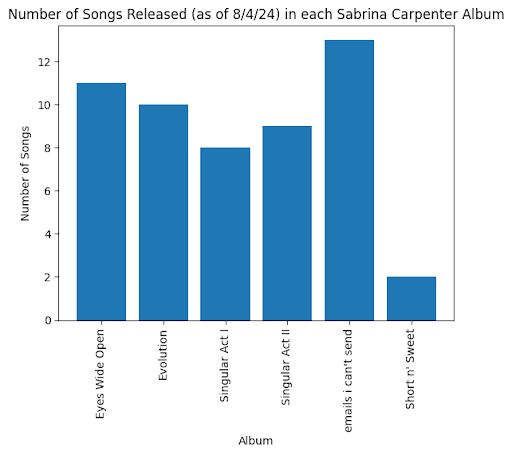

**Figure 1. Old Graph Depicting Missing Data (11 songs expected in *Eyes Wide Ope*n)**

Upon further inspection, [Lyrics.com was missing the link](https://www.lyrics.com/album/3191389/Eyes-Wide-Open#google_vignette) to one of her songs, "The Middle of Starting Over" from *Eyes Wide Open*, so I manually specified [the URL](https://www.lyrics.com/lyric-lf/953950/Sabrina+Carpenter/The+Middle+of+Starting+Over) in my code before retrieving the lyrical data. The bar graph shows the expected number of songs per album.

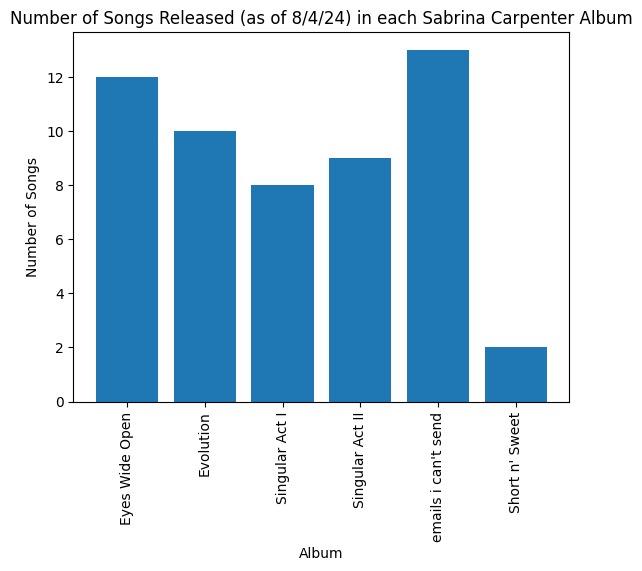

In [6]:
# Data visualization to ensure correct number of songs in each album
# NOTE: Originally was incorrect, so added the missing song in the code above. Now, bar graph is correct.
plt.bar(sc_albums, [len(eyes_wide_open_songs_lyrics), len(evolution_songs_lyrics), len(singular_act_1_songs_lyrics), len(singular_act_2_songs_lyrics), len(eics_songs_lyrics), len(sns_songs_lyrics)])
plt.title("Number of Songs Released (as of 8/4/24) in each Sabrina Carpenter Album")
plt.xticks(rotation=90)
plt.xlabel("Album")
plt.ylabel("Number of Songs")
plt.show()

In [7]:
# DATA PROCESSING: Obtain stopwords and sentiment analyzer
stop_words = stopwords.words('english')

sia = vader.SentimentIntensityAnalyzer()

In [8]:
# METHOD 1 (CHOSEN): Adding the exact polarity score determined by SIA.
def get_song_sentiment(song_lyrics):
  song_words = word_tokenize(song_lyrics)
  song_sentiment_score = 0

  for word in song_words:
    if word not in stop_words: # check that word isn't a stopword
      score = sia.polarity_scores(word)['compound']
      song_sentiment_score += score

  return song_sentiment_score

# METHOD 2 (NOT USED): Adding or subtracting 1 for positive or negative polarity scores, respectively.
def alt_get_song_sentiment(song_lyrics):
  song_words = word_tokenize(song_lyrics)
  song_sentiment_score = 0

  for word in song_words:
    if word not in stop_words: # check that word isn't a stopword
      score = sia.polarity_scores(word)['compound']
      if score > 0:
        song_sentiment_score += 1
      elif score < 0:
        song_sentiment_score -= 1

  return song_sentiment_score

In [9]:
# Get sentiment scores for each song in each album and order the lists from positive to negative sentiment

# Eyes Wide Open
eyes_wide_open_sentiment_scores = []
for song in eyes_wide_open_songs_lyrics:
  eyes_wide_open_sentiment_scores.append(get_song_sentiment(song))

ordered_eyes_wide_open_songs = [songs for _,songs in sorted(zip(eyes_wide_open_sentiment_scores, eyes_wide_open_songs))]
ordered_eyes_wide_open_sentiment_scores = sorted(eyes_wide_open_sentiment_scores)

# Evolution
evolution_sentiment_scores = []
for song in evolution_songs_lyrics:
  evolution_sentiment_scores.append(get_song_sentiment(song))

ordered_evolution_songs = [songs for _,songs in sorted(zip(evolution_sentiment_scores, evolution_songs))]
ordered_evolution_sentiment_scores = sorted(evolution_sentiment_scores)

# Singular Act I
singular_act_1_sentiment_scores = []
for song in singular_act_1_songs_lyrics:
  singular_act_1_sentiment_scores.append(get_song_sentiment(song))

ordered_singular_act_1_songs = [songs for _,songs in sorted(zip(singular_act_1_sentiment_scores, singular_act_1_songs))]
ordered_singular_act_1_sentiment_scores = sorted(singular_act_1_sentiment_scores)

# Singular Act II
singular_act_2_sentiment_scores = []
for song in singular_act_2_songs_lyrics:
  singular_act_2_sentiment_scores.append(get_song_sentiment(song))

ordered_singular_act_2_songs = [songs for _,songs in sorted(zip(singular_act_2_sentiment_scores, singular_act_2_songs))]
ordered_singular_act_2_sentiment_scores = sorted(singular_act_2_sentiment_scores)

# emails i can't send
eics_sentiment_scores = []
for song in eics_songs_lyrics:
  eics_sentiment_scores.append(get_song_sentiment(song))

ordered_eics_songs = [songs for _,songs in sorted(zip(eics_sentiment_scores, eics_songs))]
ordered_eics_sentiment_scores = sorted(eics_sentiment_scores)

# Short n' Sweet
sns_sentiment_scores = []
for song in sns_songs_lyrics:
  sns_sentiment_scores.append(get_song_sentiment(song))

ordered_sns_songs = [songs for _,songs in sorted(zip(sns_sentiment_scores, sns_songs))]
ordered_sns_sentiment_scores = sorted(sns_sentiment_scores)

### Streaming Data

As a way to measure the effect of her lyrical sentiment, I used the total number of streams recorded on Spotify for each song. To collect this streaming data, I used [kworb.net](http://kworb.net), a website containing music-related data. This website was used because Spotify does not offer a straightforward way to retrieve the total number of plays for a track. As this site collects updated relevant data in a simple format for web scraping, I used kworb.net as an alternative to directly obtaining information from Spotify.

[Carpenter’s Spotify Top Songs page on kworb.net](https://kworb.net/spotify/artist/74KM79TiuVKeVCqs8QtB0B_songs.html) contains a table ordering all her songs by total number of streams, with the most streamed track at the top. The table also specifies the daily number of streams for each track. Songs that Carpenter is featured in are marked with an asterisk in the title, although this is not a problem as this research focuses on Carpenter's own songs.

In [10]:
# Get streaming data
streams_table = pd.read_html('https://kworb.net/spotify/artist/74KM79TiuVKeVCqs8QtB0B_songs.html', match="Song Title") # extract table with streams per song

streams_df = streams_table[0]
streams_df.head()

,Song Title,Streams,Daily
0,Espresso,993067798,5734913
1,Nonsense,918177256,1478253
2,* On My Way,693117653,352829
3,Feather,591221590,1295538
4,Please Please Please,506930322,5455951


In [11]:
# Create dictionary to map song title to lyrics to easily add to dataframe
def map_title_to_lyrics(song_titles_list, song_lyrics_list):
  songs_to_lyrics = {t:l for (t, l) in zip(song_titles_list, song_lyrics_list)}
  return songs_to_lyrics

# Merges dict1 into dict2 (modifies dict 2)
def merge_dicts(dict1, dict2):
    dict2.update(dict1)
    return

In [12]:
# Map each album's songs to lyrics and combine them into one large dict
eyes_wide_open_dict = map_title_to_lyrics(eyes_wide_open_songs, eyes_wide_open_songs_lyrics)
evolution_dict = map_title_to_lyrics(evolution_songs, evolution_songs_lyrics)
singular_act_1_dict = map_title_to_lyrics(singular_act_1_songs, singular_act_1_songs_lyrics)
singular_act_2_dict = map_title_to_lyrics(singular_act_2_songs, singular_act_2_songs_lyrics)
eics_dict = map_title_to_lyrics(eics_songs, eics_songs_lyrics)
sns_dict = map_title_to_lyrics(sns_songs, sns_songs_lyrics)

sc_songs_to_lyrics = {}
merge_dicts(eyes_wide_open_dict, sc_songs_to_lyrics)
merge_dicts(evolution_dict, sc_songs_to_lyrics)
merge_dicts(singular_act_1_dict, sc_songs_to_lyrics)
merge_dicts(singular_act_2_dict, sc_songs_to_lyrics)
merge_dicts(eics_dict, sc_songs_to_lyrics)
merge_dicts(sns_dict, sc_songs_to_lyrics)

In [13]:
# Map each album's songs to its sentiment and combine them info one large dict
eyes_wide_open_dict = map_title_to_lyrics(eyes_wide_open_songs, eyes_wide_open_sentiment_scores)
evolution_dict = map_title_to_lyrics(evolution_songs, evolution_sentiment_scores)
singular_act_1_dict = map_title_to_lyrics(singular_act_1_songs, singular_act_1_sentiment_scores)
singular_act_2_dict = map_title_to_lyrics(singular_act_2_songs, singular_act_2_sentiment_scores)
eics_dict = map_title_to_lyrics(eics_songs, eics_sentiment_scores)
sns_dict = map_title_to_lyrics(sns_songs, sns_sentiment_scores)

sc_songs_to_sentiment_score = {}
merge_dicts(eyes_wide_open_dict, sc_songs_to_sentiment_score)
merge_dicts(evolution_dict, sc_songs_to_sentiment_score)
merge_dicts(singular_act_1_dict, sc_songs_to_sentiment_score)
merge_dicts(singular_act_2_dict, sc_songs_to_sentiment_score)
merge_dicts(eics_dict, sc_songs_to_sentiment_score)
merge_dicts(sns_dict, sc_songs_to_sentiment_score)

In [14]:
# Map each song to its album and combine them info one large dict
eyes_wide_open_dict = {k: "Eyes Wide Open" for k in eyes_wide_open_songs}
evolution_dict = {k: "Evolution" for k in evolution_songs}
singular_act_1_dict = {k: "Singular Act I" for k in singular_act_1_songs}
singular_act_2_dict = {k: "Singular Act II" for k in singular_act_2_songs}
eics_dict = {k: "emails i can’t send" for k in eics_songs}
sns_dict = {k: "Short n' Sweet" for k in sns_songs}

sc_songs_to_album = {}
merge_dicts(eyes_wide_open_dict, sc_songs_to_album)
merge_dicts(evolution_dict, sc_songs_to_album)
merge_dicts(singular_act_1_dict, sc_songs_to_album)
merge_dicts(singular_act_2_dict, sc_songs_to_album)
merge_dicts(eics_dict, sc_songs_to_album)
merge_dicts(sns_dict, sc_songs_to_album)

In [15]:
# Add lyrics column to streams dataframe
streams_df['Lyrics'] = streams_df['Song Title'].map(sc_songs_to_lyrics)

# Add sentiment column to streams dataframe
streams_df['Sentiment Score'] = streams_df['Song Title'].map(sc_songs_to_sentiment_score)

# Add album column to streams dataframe
streams_df['Album'] = streams_df['Song Title'].map(sc_songs_to_album)

# Clean dataframe by removing songs that we're not interested in
cleaned_streams_df1 = streams_df.dropna(subset=['Lyrics'])

# Drop duplicate 'Almost Love' song
cleaned_streams_df = cleaned_streams_df1.drop_duplicates(subset=['Song Title'])

cleaned_streams_df

,Song Title,Streams,Daily,Lyrics,Sentiment Score,Album
0,Espresso,993067798,5734913,"Now he's thinkin' 'bout me every night, oh\nIs...",6.1058,Short n' Sweet
1,Nonsense,918177256,1478253,"No (yeah)\n(La-la) da-ah\n(Ah, uh, uh, uh, yea...",2.9526,emails i can’t send
4,Please Please Please,506930322,5455951,"I know I have good judgment, I know I have goo...",9.3992,Short n' Sweet
5,Thumbs,287085022,179334,"Somewhere in the world there, is a father and ...",-1.1148,Evolution
6,Looking at Me,280046711,432830,"Oh\r\nOh, yeah\r\n\r\nDid I catch your attenti...",2.1472,Singular Act II
7,Sue Me,239139970,122265,Remember when you said that there’s no second ...,9.8591,Singular Act I
8,because i liked a boy,213910141,657633,I said I wanted thin mints and you said you kn...,-0.6785,emails i can’t send
13,emails i can’t send,110764181,173787,It's times like these wish I had a time machin...,0.5965,emails i can’t send
14,Read your Mind,99971928,285960,Ahh\n\nMade it clear when you told me (ahh)\nD...,3.7078,emails i can’t send
16,Vicious,94017965,135017,"One year, ten thousand bad moments\nBut it was...",-0.5727,emails i can’t send


To visualize the change of sentiment across her musical career, I created different plots for each album, which depict each song’s sentiment. For calculating sentiment polarity scores, I tested two different methods to see which would result in clearer interpretations of the lyrical data.

In the first method, I adjusted sentiment scores by adding/subtracting 1 for positive/negative scores, respectively (Figure 2). For example, a positive sentiment score of 0.4 would be rounded up to 1, while a negative sentiment score of -0.35 would be rounded to -1. This method tends to result in greater variances between positive and negative sentiments.

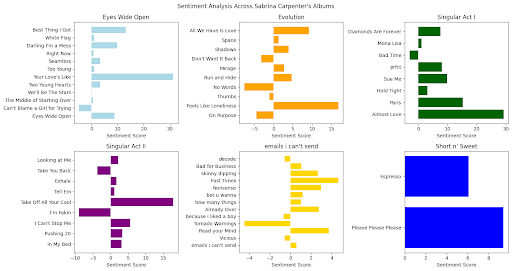

**Figure 2. Exploratory Bar Graph: Method 1 of calculating sentiment score (rounding to 1 or -1)**

For the second method, pictured below, I summed the original polarity scores of each word for each song (Figure 3). This allows for a detailed granularity and accurately reflects the summed sentiments for each song.

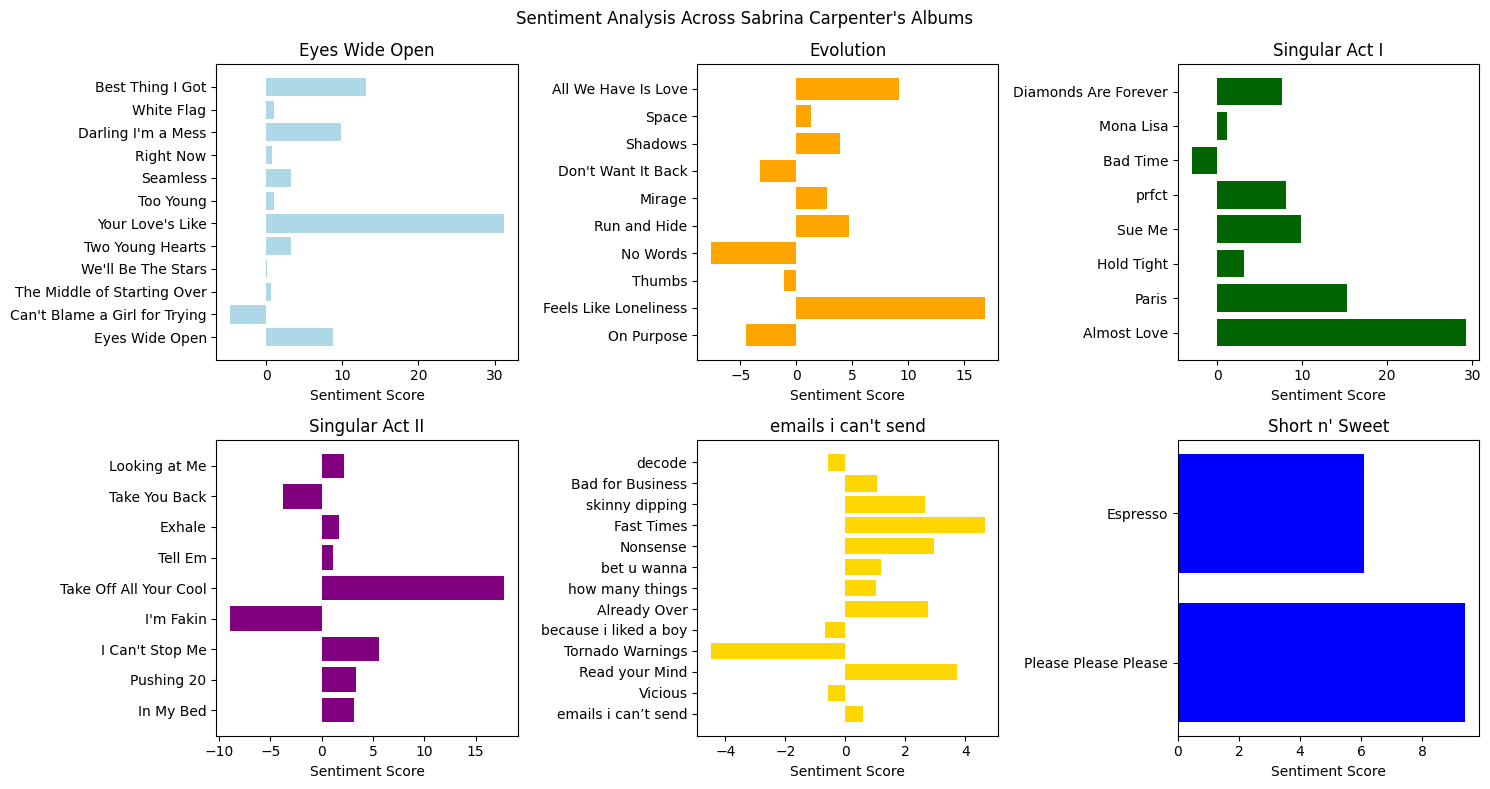

In [16]:
# UNORDERED VERSION: Make horizontal bar plots of sentiments for each album
figure, axis = plt.subplots(2, 3, figsize=(15, 8))

axis[0][0].barh(eyes_wide_open_songs, eyes_wide_open_sentiment_scores, color="lightblue")
axis[0][0].set_title("Eyes Wide Open")
axis[0][0].set_xlabel("Sentiment Score")

axis[0][1].barh(evolution_songs, evolution_sentiment_scores, color="orange")
axis[0][1].set_title("Evolution")
axis[0][1].set_xlabel("Sentiment Score")

axis[0][2].barh(singular_act_1_songs, singular_act_1_sentiment_scores, color="darkgreen")
axis[0][2].set_title("Singular Act I")
axis[0][2].set_xlabel("Sentiment Score")

axis[1][0].barh(singular_act_2_songs, singular_act_2_sentiment_scores, color="purple")
axis[1][0].set_title("Singular Act II")
axis[1][0].set_xlabel("Sentiment Score")

axis[1][1].barh(eics_songs, eics_sentiment_scores, color="gold")
axis[1][1].set_title("emails i can't send")
axis[1][1].set_xlabel("Sentiment Score")

axis[1][2].barh(sns_songs, sns_sentiment_scores, color="blue")
axis[1][2].set_title("Short n' Sweet")
axis[1][2].set_xlabel("Sentiment Score")

plt.suptitle("Sentiment Analysis Across Sabrina Carpenter's Albums")

plt.tight_layout()

**Figure 3. Exploratory Bar Graph: Method 2 of calculating sentiment score (summing original score)**

Comparing the two sets of plots, I actually preferred Method 2 (using the original polarity scores) because the sentiments already had a distinguishable variance between songs. Method 1 of calculating sentiment (rounding to 1 or -1) overdramatized this discrepancy to the point where the variation between some song sentiments were more challenging to analyze. For instance, looking at the *Evolution* album, Method 1 shows a small bar for almost half the songs (“Space”, “Don't Want It Back”, “Run and Hide”, and “Thumbs”) that make it difficult to compare. However, Method 2 more clearly depicts the differences in sentiment score between those songs. Therefore, the sentiment analysis method chosen to more thoroughly analyze sentiment was Method 2.

To summarize Carpenter's lyric sentiments, I plotted a histogram to easily view the distribution of songs (Figure 4).

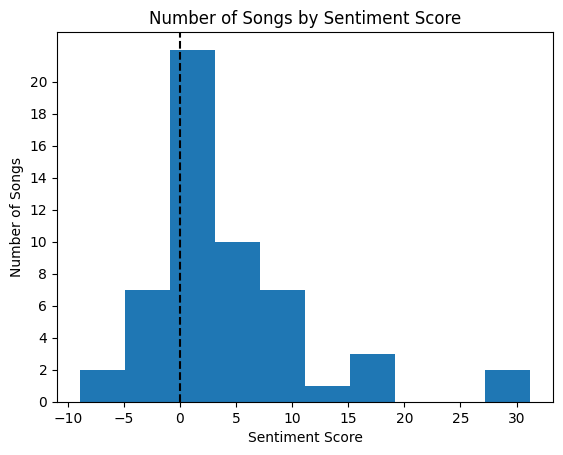

In [17]:
# Plot histogram of sentiment scores for Sabrina Carpenter's songs
cleaned_streams_df.hist(column=['Sentiment Score'])
plt.title("Number of Songs by Sentiment Score")
plt.xlabel("Sentiment Score")
plt.yticks(ticks=np.arange(0, 22, step=2))
plt.ylabel("Number of Songs")
plt.grid(False)
plt.axvline(x=0, color="black", linestyle="--")

**Figure 4. Exploratory distribution of Carpenter's songs sentiment scores**

The histogram shows that most of Carpenter’s songs are somewhat symmetrical in having a negative or positive sentiment, although there is a slight skew for a more positive sentiment. However, there are some outliers at a score of around 30, which I predict to be repetitive and/or tackier songs.

To view if there may be correlation between song sentiment and number of streams, I created a scatter plot (Figure 5). This mimics the histogram above in seeing the distribution of songs' sentiment scores but expands it by also depicting songs' stream count.

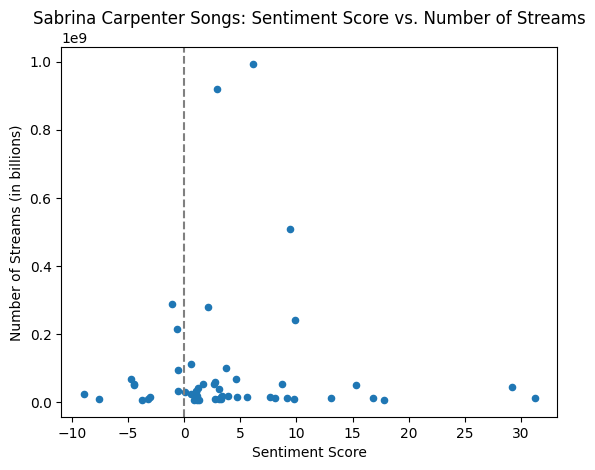

In [18]:
# Plot streaming data vs sentiment score
cleaned_streams_df.plot.scatter(x='Sentiment Score', y='Streams', title="Sabrina Carpenter Songs: Sentiment Score vs. Number of Streams", ylabel="Number of Streams (in billions)")
plt.axvline(x=0, color="gray", linestyle="--")

**Figure 5. Exploratory Scatter Plot of Sentiment Scores and Number of Streams**

The scatter plot reveals that Carpenter's top-streamed songs generally have a positive sentiment with moderate intensity. Although not every song is a hit, the sentiment score range of -1 to 10 seems to be optimal for her most played tracks on Spotify. However, the graph's effectiveness is limited because it only displays dots representing individual, unidentifiable songs. To enhance clarity, I have improved the plot by coloring each point according to its album and adding interactivity to view the metadata of each song.

# Results and Discussion

To gain a clearer understanding of the sentiment across Carpenter's albums, I plotted the sentiment scores for each song in a bar graph, grouped by album and arranged from the most to least positive (Figure 6). The analysis reveals that, overall, most of Carpenter's songs exhibit a positive sentiment according to Vader's Sentiment Intensity Analyzer (SIA). However, each album contains at least one song with a negative sentiment score.

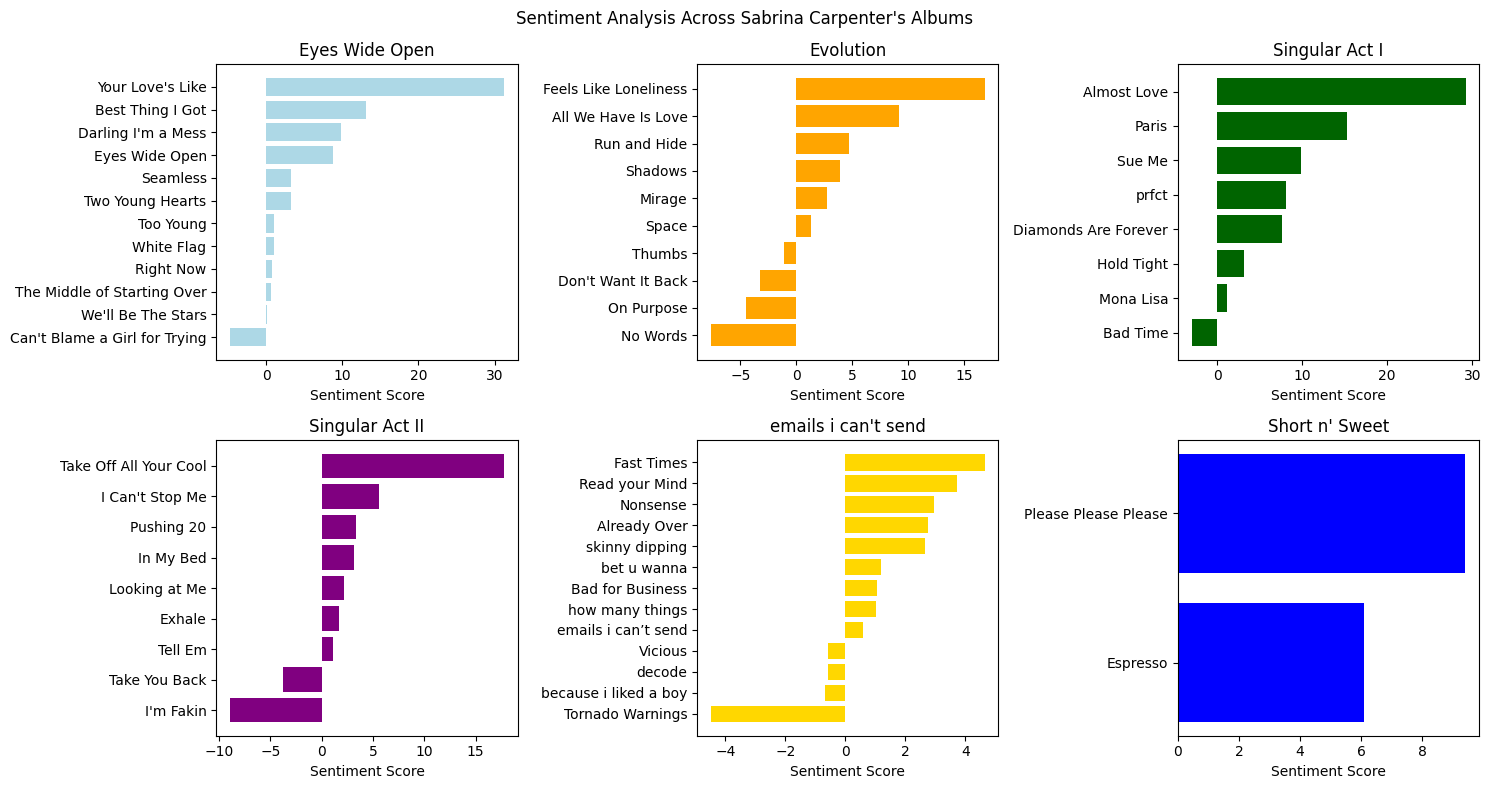

In [19]:
# ORDERED VERSION: Make horizontal bar plots of sentiments for each album
figure, axis = plt.subplots(2, 3, figsize=(15, 8))

axis[0][0].barh(ordered_eyes_wide_open_songs, ordered_eyes_wide_open_sentiment_scores, color="lightblue")
axis[0][0].set_title("Eyes Wide Open")
axis[0][0].set_xlabel("Sentiment Score")

axis[0][1].barh(ordered_evolution_songs, ordered_evolution_sentiment_scores, color="orange")
axis[0][1].set_title("Evolution")
axis[0][1].set_xlabel("Sentiment Score")

axis[0][2].barh(ordered_singular_act_1_songs, ordered_singular_act_1_sentiment_scores, color="darkgreen")
axis[0][2].set_title("Singular Act I")
axis[0][2].set_xlabel("Sentiment Score")

axis[1][0].barh(ordered_singular_act_2_songs, ordered_singular_act_2_sentiment_scores, color="purple")
axis[1][0].set_title("Singular Act II")
axis[1][0].set_xlabel("Sentiment Score")

axis[1][1].barh(ordered_eics_songs, ordered_eics_sentiment_scores, color="gold")
axis[1][1].set_title("emails i can't send")
axis[1][1].set_xlabel("Sentiment Score")

axis[1][2].barh(ordered_sns_songs, ordered_sns_sentiment_scores, color="blue")
axis[1][2].set_title("Short n' Sweet")
axis[1][2].set_xlabel("Sentiment Score")

plt.suptitle("Sentiment Analysis Across Sabrina Carpenter's Albums")

plt.tight_layout()

**Figure 6. Bar Graph of Sentiment Scores Across Carpenter's Song, By Album**

Additionally, there is a loose trend in the magnitude of sentiment across songs in Carpenter’s albums. Looking closely at the x-axis labels, it appears that in her earlier albums, Carpenter’s “positive” songs generally have stronger sentiment magnitudes. However, in her most recent albums, Singular Act II and emails I can’t send, the sentiment scores for most, if not all, songs fall within a narrower range of approximately -5 to 5. This smaller range of sentiment scores may not necessarily indicate more “neutral” songs but rather may reflect a more nuanced approach to songwriting, where strong sentiment words balance each other out.

In [20]:
# Install altair for interactive data visualizations
!pip install -U altair

import altair as alt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 857.8/857.8 kB 20.6 MB/s eta 0:00:00
  Attempting uninstall: altair
    Found existing installation: altair 4.2.2
    Uninstalling altair-4.2.2:
      Successfully uninstalled altair-4.2.2


Considering streaming numbers, I plotted the sentiment scores against the Spotify stream count for each song (Figure 7). The resulting plot resembles a bell curve with a mean around 5, showing that Carpenter's most-played songs generally have sentiment scores between -1 and 10. This indicates that her most successful songs tend to have a positive sentiment, though not excessively so. However, many songs with similar sentiment scores have lower streaming counts.

In [21]:
# Plot interactive scatter plot of sentiment score vs. stream count using Altair
selopac = alt.selection_point(on='mouseover', fields=['Album'], bind='legend')
dom = ['Eyes Wide Open', 'Evolution', 'Singular Act I', 'Singular Act II', 'emails i can’t send', 'Short n\' Sweet']
rng = ['deepskyblue', 'darkorange', 'darkgreen', 'purple', 'goldenrod', 'blue']

alt.Chart(cleaned_streams_df, title="Sentiment Score vs. Spotify Stream Count of Sabrina Carpenter Songs").mark_point(size=40).encode(
    x='Sentiment Score',
    y='Streams',
    tooltip=['Song Title', 'Album', 'Streams', 'Sentiment Score'],
    opacity=alt.condition(selopac, alt.value(1), alt.value(0.2)),
    color=alt.Color('Album', scale=alt.
                    Scale(domain=dom, range=rng))
).add_params(
    selopac
).interactive()

alt.Chart(...)

**Figure 7. Interactive Plot of Sentiment Score vs. Streams for Carpenter's Songs**

It is evident that Carpenter's most streamed songs come from her recent album, *Short n' Sweet*. Additionally, her album *emails i can't send* features a cluster of tracks, each with at least 50 million streams, indicating that these songs have similar sentiment scores and comparable performance. This is notable because one might expect that a greater range of sentiment could appeal to a wider audience. However, it appears that a more balanced sentiment in her songs has contributed to higher streaming numbers. Furthermore, each album before this—excluding her debut—includes at least one standout track that performed significantly better than the others.

For a different perspective on sentiment scores and stream counts, I plotted the average values for each of Carpenter's albums in order of release (Figure 8). This approach helps visualize the relationship across Carpenter's musical career, despite not capturing the granularity of each individual song's success.

In [22]:
# Plot horizontal interactive line plots average stream count and average sentiment scores across albums using Altair
selopac = alt.selection_point(nearest=True,on='mouseover')

avg_streams_chart = alt.Chart(cleaned_streams_df, title="Average Spotify Stream Count").transform_aggregate(
    streams_mean='mean(Streams)',
    groupby=['Album']
).mark_line(point=True).encode(
    x=alt.X('Album:O', sort=['Eyes Wide Open', 'Evolution', 'Singular Act I', 'Singular Act II', 'emails i can’t send', 'Short n\' Sweet'], title='Album'),
    y=alt.Y('streams_mean:Q', title="Value"),
    tooltip=['streams_mean:Q']
).properties(
    width=400,
    height=300
).add_params(
    selopac
).interactive()

avg_sentiment_chart = alt.Chart(cleaned_streams_df, title="Average Sentiment Score").transform_aggregate(
    sentiment_mean='mean(Sentiment Score)',
    groupby=['Album']
).mark_line(point=True).encode(
    x=alt.X('Album:O', sort=['Eyes Wide Open', 'Evolution', 'Singular Act I', 'Singular Act II', 'emails i can’t send', 'Short n\' Sweet'], title='Album'),
    y=alt.Y('sentiment_mean:Q', title="Value"),
    tooltip=['sentiment_mean:Q'],
    color=alt.value('orange')
).properties(
    width=400,
    height=300
).add_params(
    selopac
).interactive()

avg_streams_chart | avg_sentiment_chart

alt.HConcatChart(...)

**Figure 8. Average Stream Counts and Sentiment Scores Across Carpenter's Albums**

The data reveals that the average stream count for her albums has been almost consistently increasing, with a notable surge in her latest two albums. However, the sentiment scores across albums do not follow a clear pattern.

## Conclusion

Overall, there is not a clear pattern depicted among Carpenter's lyrical sentiment across albums, which may suggest that Carpenter is experimenting more freely with her lyrical sentiment in different collections of work. However, it was clear that most of her best performing songs had a positive sentiment rating with low intensity, with a score ranging from -1 to 10. No song with a strongly positive or negative sentiment score received more than 100 million plays. It seems that a more balanced sentiment in her songs has led to higher streaming numbers, possibly indicating a more nuanced approach to songwriting where strong emotional elements are balanced against each other.

Looking ahead at her upcoming album, *Short n' Sweet*, it is starting off with a stronger positive sentiment. However, this observation might be skewed as only two songs were released at the time of this analysis, "Espresso" and "Please Please Please". Given her previous success with an average sentiment score of 1.10 for her last album, *emails i can't send*, I anticipate that she will likely continue to release songs with a lower or balanced sentiment score. Nevertheless, since her current singles from *Short n' Sweet* have achieved notable success with a positive sentiment averaging at 7.75, she may choose to maintain this direction. Still, despite *Singular Act I* being her most positive album with an average sentiment score of 8.9, it did not achieve significant success. Therefore, I expect her upcoming album to have a higher average sentiment score compared to *emails i can't send*, but I also predict that the average sentiment might decrease slightly as she includes a broader range of sentiments to balance the album.

#### Critique and Future Prospects
While sentiment scores can provide a general sense of a song's emotional tone, analyzing sentiment word-by-word might not always accurately reflect the song's true sentiment. For instance, the song “Don't Want It Back” from *Evolution* has a sentiment score of -3.2. Although the Vader SIA tool might interpret this as a strong negative sentiment—possibly due to the frequent use of the word “don't” (as reflected in the song's title)—the actual meaning of the song is positive. In it, Carpenter expresses contentment with her relationship to the extent that she doesn't want her heart back, indicating a joyful sentiment despite the negative score.

If I were to extend this project, I would conduct a comprehensive review of Carpenter's career to understand her rise to fame more thoroughly. This may include examining various external factors beyond her lyric sentiment that may have influenced her popularity. For example, I would create a timeline of significant events in her life, explore popular trends, and analyze the efforts of her marketing team to gain a clearer picture of her growth in listeners. Additionally, I would like to study other artists across different genres and time periods to identify whether similar trends occur in their careers.
